In [1]:
#Importing libraries and filtering warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [2]:
# Read the application data csv

app = pd.read_csv('application_data.csv')
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
previous_app = pd.read_csv('previous_application.csv')
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Inspecting Dataframe

In [4]:
#checking for the numbers of rows and columns in a dataframe
app.shape

(307511, 122)

In [5]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
#Read the previous_application data
previous_app=pd.read_csv('previous_application.csv')
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Exploring the dataset previous application
previous_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [8]:
#Exploring the dataset application data
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Data Cleaning

   ### Fix Columns

In [9]:
#explore the information of the dataset
app.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [10]:
#checking for the count of null values in each column
app.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
#checking for percentage of null values in each column
pd.set_option('display.max_rows', 500)
app.isnull().mean().round(4)*100

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [12]:
k=(app.isnull().mean()*100)>40

In [13]:
k

SK_ID_CURR                      False
TARGET                          False
NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                     False
AMT_GOODS_PRICE                 False
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
OWN_CAR_AGE                      True
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE  

##### Inference: As we can observe there are columns which hold large set of missing data of more than 40%. So now we can drop these columns as it may create disturbances to our data analysis

In [14]:
delcols = app.loc[:,'BASEMENTAREA_AVG':'EMERGENCYSTATE_MODE'].columns
app.drop(delcols, inplace=True, axis=1)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Remove Document Flags as it doesn't have much scope in the analysis
delcols = app.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns
app.drop(delcols, inplace=True, axis=1)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


## Handling Missing values in columns

In [16]:
# Finding percentage of null values for each columns

app.isnull().mean().round(4) * 100

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

### Inference : We can observe that Occupation Type has 31% of missing values which can be handled with fillna() method 

In [17]:
#Fill the empty values in Occupation Type column with 'Others'
app.OCCUPATION_TYPE.fillna('Others', inplace = True)
app.OCCUPATION_TYPE.isnull().sum()

0

In [18]:
#Replacing null vales in EXT_SCORES columns
app['EXT_SOURCE_AVG'] = app.loc[:, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738


### Handling Outliers

In [19]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307339.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,0.509251
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,0.149802
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413648
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.524502
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.622819
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,0.878903


In [20]:
app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

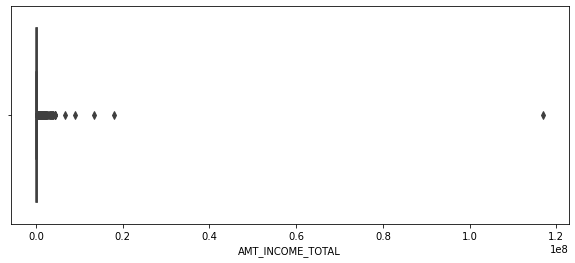

In [21]:
plt.figure(figsize=[10,4])
sns.boxplot(app.AMT_INCOME_TOTAL)
plt.show()

#### Inference: We can observe that there is a outlier at greater than 1.0. Now let's find the data of that outlier

In [22]:
app.AMT_INCOME_TOTAL.quantile([.5, .7, .9, .95, 0.99, 0.999, 0.9999])

0.5000     147150.0
0.7000     180000.0
0.9000     270000.0
0.9500     337500.0
0.9900     472500.0
0.9990     900000.0
0.9999    2250000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [23]:
#Checking for values which lies outside 0.999 percentile
app[app.AMT_INCOME_TOTAL > 0.2*10**8]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.239838


#### Inference: If we observe here The Income  Total value is way too high than normal. As we observe that these value may effect our analysis, let's drop this value(Significantly the outliers which are above 0.999)

## Analyze the columns in dataframe to find outliers using plots

In [24]:
app = app[~(app.AMT_INCOME_TOTAL > 0.2*10**8)]
app.shape

(307510, 57)

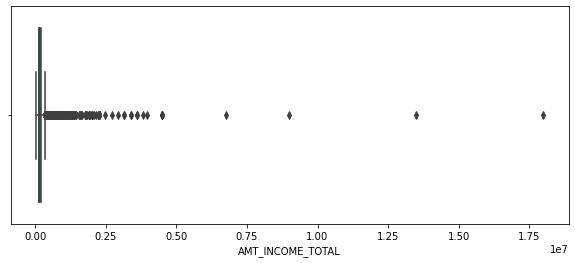

In [25]:
plt.figure(figsize=[10,4])
sns.boxplot(app.AMT_INCOME_TOTAL)
plt.show()

In [26]:
app.AMT_CREDIT.describe()

count    3.075100e+05
mean     5.990261e+05
std      4.024914e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

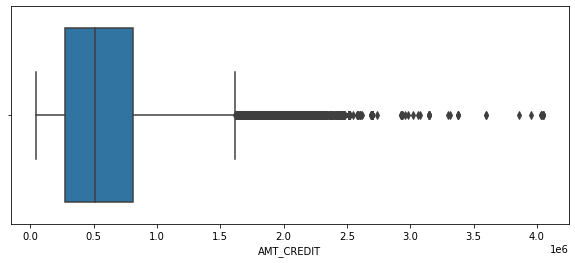

In [27]:
plt.figure(figsize=[10,4])
sns.boxplot(app.AMT_CREDIT)
plt.show()

In [28]:
app.AMT_CREDIT.quantile([.5, .7, .9, .95, 0.99])


0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [29]:
#now let's find if there are any outliers above 99 percentile
app[app.AMT_CREDIT > 1854000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,...,0.0,0.0,-926.0,0.0,0.0,0.0,0.0,0.0,3.0,0.536725
337,100389,0,Cash loans,M,Y,Y,0,247500.0,1971072.0,68643.0,...,0.0,0.0,-2421.0,0.0,0.0,0.0,0.0,0.0,1.0,0.682066
341,100393,0,Cash loans,M,Y,Y,2,405000.0,2250000.0,59485.5,...,0.0,0.0,-1014.0,0.0,0.0,0.0,0.0,0.0,1.0,0.687440
441,100508,0,Cash loans,F,Y,Y,0,450000.0,1971072.0,62019.0,...,0.0,0.0,-523.0,0.0,0.0,0.0,0.0,4.0,1.0,0.621544
485,100559,0,Cash loans,F,Y,Y,0,450000.0,2286211.5,116266.5,...,1.0,0.0,-2675.0,NaN,NaN,NaN,NaN,NaN,NaN,0.503266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307055,455739,0,Cash loans,F,N,Y,0,112500.0,2032992.0,70794.0,...,1.0,0.0,-1866.0,0.0,0.0,0.0,0.0,0.0,5.0,0.686170
307095,455785,0,Cash loans,F,Y,Y,0,135000.0,2013840.0,53253.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.501501
307165,455868,0,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,...,14.0,1.0,-698.0,0.0,0.0,0.0,0.0,1.0,4.0,0.685095
307214,455922,0,Cash loans,M,Y,N,2,256500.0,2290743.0,60556.5,...,0.0,0.0,-16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.612112


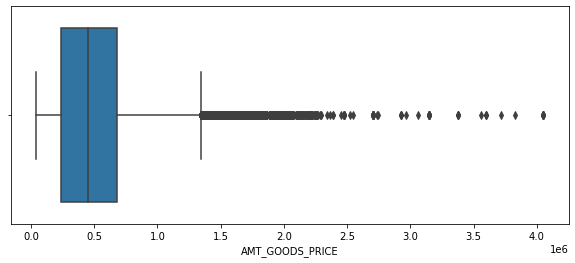

In [30]:
#Plotting boxplot for AMT_GOOD_PRICE Column
plt.figure(figsize=[10,4])
sns.boxplot(app.AMT_GOODS_PRICE)
plt.show()

In [31]:
app.DAYS_BIRTH.describe()

count    307510.000000
mean     -16037.006195
std        4363.991364
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [32]:
app.DAYS_BIRTH

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307510, dtype: int64

#### Inference: Here we can see the values look unusual. As they are stored in number format, now lets try creating a new column as Age which helps to calculate teh age of the individuals

In [33]:
#Creating a new column age in our app dataframe
app['AGE'] = np.ceil(app.DAYS_BIRTH / -365)
app.AGE.head()

0    26.0
1    46.0
2    53.0
3    53.0
4    55.0
Name: AGE, dtype: float64

In [34]:
#DEscribe teh Age column to find the prcentile of ages of individuals
app.AGE.describe()

count    307510.000000
mean         44.433121
std          11.954500
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE, dtype: float64

In [35]:
pd.set_option('display.max_columns', None)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,26.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,46.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,53.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,53.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,55.0


#### Observation: When we look at DAYS_EMPLOYED Column we can see that the individul employeed is given in number of days. Now let's manage to convert it into years and months 

In [36]:
#Creating a new column as Experience to convers the days employeed into yers of experience
app['EXPERIENCE'] = np.round(app.DAYS_EMPLOYED / -365, 1)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE,EXPERIENCE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,26.0,1.7
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,46.0,3.3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,53.0,0.6
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,53.0,8.3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,55.0,8.3


In [37]:
#Let's describe the excerience column to check if there are any missing values
app.EXPERIENCE.describe()

count    307510.000000
mean       -174.842540
std         387.070526
min       -1000.700000
25%           0.800000
50%           3.300000
75%           7.600000
max          49.100000
Name: EXPERIENCE, dtype: float64

#### Inference: We can observe that there are some negative values in the experience. As we know an individual cannot have less than 0 months of experience let's handle them

In [38]:
(app['EXPERIENCE'] < 0).value_counts()

False    252136
True      55374
Name: EXPERIENCE, dtype: int64

#### We can observe that there are 55374 rows with negative values. At this instant we can't drop all these rows as they are large in number and may effect our analysis due to loss of data. Let's fill those values with nan as we cannot declare their importance at this instant

In [39]:
#Filling negative values with nan 
app.loc[app['EXPERIENCE'] < 0, 'EXPERIENCE'] = np.NaN
(app['EXPERIENCE'] < 0).value_counts()


False    307510
Name: EXPERIENCE, dtype: int64

In [40]:
app.NAME_FAMILY_STATUS.value_counts()

Married                 196431
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

#### Inferences
1. The Married and Civil Married Columns are same, let's merge those columns.
2. Let's convert Single/Not married to Single. 
3. We can find there are 2 unknown values which can be dropped

In [41]:
app["NAME_FAMILY_STATUS"].replace({"Civil marriage": "Married", "Single / not married": "Single"}, inplace=True)


In [42]:
app = app[~(app.NAME_FAMILY_STATUS == 'Unknown')]

In [43]:
#checking if the status unknown is dropped or not
app[(app.NAME_FAMILY_STATUS == 'Unknown')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE,EXPERIENCE


In [44]:
app.CODE_GENDER.value_counts()

F      202446
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64

#### Inference:
Since, Female is having the majority values and only 4 rows are having XNA values, we can update those columns with Gender 'F' 

In [45]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

app.loc[app['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app['CODE_GENDER'].value_counts()

F    202450
M    105058
Name: CODE_GENDER, dtype: int64

In [46]:
app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278231
Revolving loans     29277
Name: NAME_CONTRACT_TYPE, dtype: int64

In [47]:
app['Credit_Bureau_Total'] = app.iloc[:,-9:-3].sum(axis=1)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE,EXPERIENCE,Credit_Bureau_Total
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,26.0,1.7,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,46.0,3.3,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,53.0,0.6,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,53.0,8.3,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,55.0,8.3,0.0


In [48]:
app['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67991
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Inference: We can see that there are large number of rows with XNA as value. 

In [49]:
#dropping the rows that have 'XNA' values in the organization type column

app=app.drop(app.loc[app['ORGANIZATION_TYPE']=='XNA'].index)
app[app['ORGANIZATION_TYPE']=='XNA'].shape

(0, 60)

In [50]:
#Analyzing the number of rows and columns of previous_app dataframe
previous_app.shape

(1670214, 37)

In [51]:
#Gather the info of the dataframe
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [52]:
#Now let's check for teh count of null values
previous_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

#### Inference from dataset: Here using this previous application  data we can check if an individual is genuine or not. If the individual took any loans we can check if they paid it or not. 

In [53]:
previous_app.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [54]:
previous_app.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

#### Let's keep the columns SK_ID_CURR, AMT_CREDIT, NAME_CONTRACT_STATUS, CODE_REJECT_REASON, NAME_YIELD_GROUP and DAYS_TERMINATION and drop the rest. 

In [55]:
pa = previous_app[['SK_ID_CURR', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_YIELD_GROUP', 'DAYS_TERMINATION']]
pa.head()

,SK_ID_CURR,AMT_CREDIT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_YIELD_GROUP,DAYS_TERMINATION
0,271877,17145.0,Approved,XAP,middle,-37.0
1,108129,679671.0,Approved,XAP,low_action,365243.0
2,122040,136444.5,Approved,XAP,high,365243.0
3,176158,470790.0,Approved,XAP,middle,-177.0
4,202054,404055.0,Refused,HC,high,NaN


In [56]:
#Now let's rename the columns in the datset so while merging the datframes it makes the columns more readable and understandable
names = {'AMT_CREDIT': 'PREV_AMT_CREDIT', 'NAME_CONTRACT_STATUS': 'PREV_CONTRACT_STATUS',
         'DAYS_TERMINATION':'PREV_DAYS_TERMINATION', 'CODE_REJECT_REASON':'PREV_REJECT_REASON',
        'NAME_YIELD_GROUP':'PREV_YIELD_GROUP'}

pa = pa.rename(columns=names)
pa.head()

,SK_ID_CURR,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION
0,271877,17145.0,Approved,XAP,middle,-37.0
1,108129,679671.0,Approved,XAP,low_action,365243.0
2,122040,136444.5,Approved,XAP,high,365243.0
3,176158,470790.0,Approved,XAP,middle,-177.0
4,202054,404055.0,Refused,HC,high,NaN


In [57]:
pa.PREV_DAYS_TERMINATION.value_counts()


 365243.0    225913
-233.0          786
-184.0          770
-170.0          770
-163.0          769
              ...  
-2795.0           1
-2797.0           1
-2809.0           1
-2808.0           1
-2852.0           1
Name: PREV_DAYS_TERMINATION, Length: 2830, dtype: int64

In [58]:
pa.PREV_DAYS_TERMINATION[pa.PREV_DAYS_TERMINATION > 0].value_counts()

365243.0    225913
Name: PREV_DAYS_TERMINATION, dtype: int64

#### Observation: The value 365243.0 denotes an impossible value, may be it is an infinite date, and hence, can be replaced by NaN

In [59]:
# Replace 365243 values with NaN

pa.PREV_DAYS_TERMINATION.replace({365243.0 : np.NaN}, inplace=True)
pa.PREV_DAYS_TERMINATION[pa.PREV_DAYS_TERMINATION > 0].value_counts()

Series([], Name: PREV_DAYS_TERMINATION, dtype: int64)

#### Now let us merge the previous applications and application data dataset, using left join.



In [60]:
app = pd.merge(left=app,right=pa, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE,EXPERIENCE,Credit_Bureau_Total,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,26.0,1.7,1.0,179055.0,Approved,XAP,low_normal,-17.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,46.0,3.3,0.0,1035882.0,Approved,XAP,low_normal,-527.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,46.0,3.3,0.0,348637.5,Approved,XAP,middle,-639.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,46.0,3.3,0.0,68053.5,Approved,XAP,middle,-1976.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,53.0,0.6,0.0,20106.0,Approved,XAP,middle,-714.0


In [61]:
app.PREV_CONTRACT_STATUS.isnull().mean()

0.011845391937125038

In [62]:
# fill nul columns in PREV_CONTRACT_STATUS with FirstApplication

app.PREV_CONTRACT_STATUS.fillna('FirstApplication', inplace=True)
app.PREV_CONTRACT_STATUS.isna().mean()

0.0

In [63]:
app.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        93
AMT_GOODS_PRICE                  1094
NAME_TYPE_SUITE                  3337
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    718627
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [64]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153782 entries, 0 to 1153781
Data columns (total 65 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1153782 non-null  int64  
 1   TARGET                       1153782 non-null  int64  
 2   NAME_CONTRACT_TYPE           1153782 non-null  object 
 3   CODE_GENDER                  1153782 non-null  object 
 4   FLAG_OWN_CAR                 1153782 non-null  object 
 5   FLAG_OWN_REALTY              1153782 non-null  object 
 6   CNT_CHILDREN                 1153782 non-null  int64  
 7   AMT_INCOME_TOTAL             1153782 non-null  float64
 8   AMT_CREDIT                   1153782 non-null  float64
 9   AMT_ANNUITY                  1153689 non-null  float64
 10  AMT_GOODS_PRICE              1152688 non-null  float64
 11  NAME_TYPE_SUITE              1150445 non-null  object 
 12  NAME_INCOME_TYPE             1153782 non-n

## Univariate Analysis

In [65]:
# Let's analyze the Target column
app.TARGET.value_counts()

0    1046616
1     107166
Name: TARGET, dtype: int64

In [66]:
# deriving new category column from TARGET

app['TARGET_DERIVED'] = app['TARGET'].apply(lambda x: 'default' if x == 1 else 'safe')
app.TARGET_DERIVED.value_counts()

safe       1046616
default     107166
Name: TARGET_DERIVED, dtype: int64

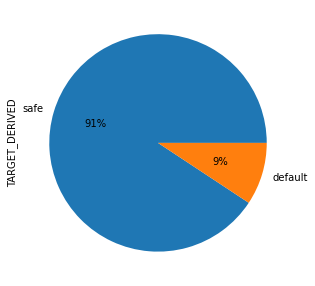

In [67]:
# Plotting a pie chart on TARGET_DERIVED column
plt.figure(figsize=(5,5))
app.TARGET_DERIVED.value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.show()

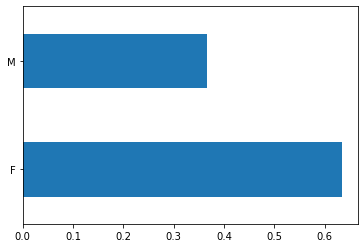

In [68]:
# plotting a bar graph for gender columns
app.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()

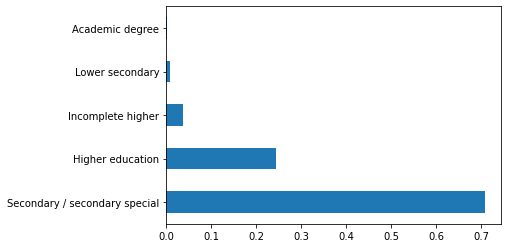

In [69]:
# Plotting bar chart for education type
app.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

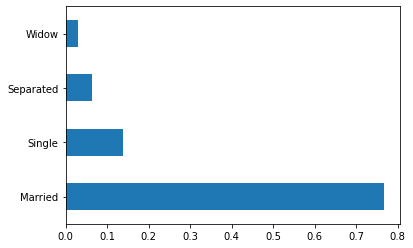

In [70]:
# Plotting bar chart for family status

app.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.show()

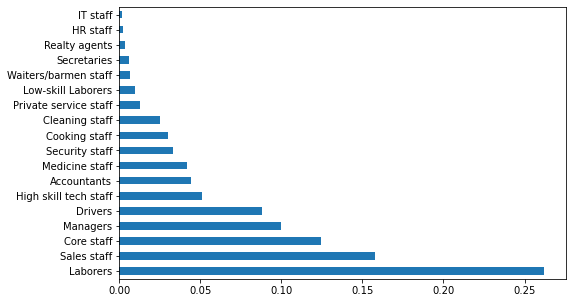

In [71]:
# Plotting bar chart for OCCUPATION type excluding others

plt.figure(figsize=(8,5))
app[~(app.OCCUPATION_TYPE == 'Others')].OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

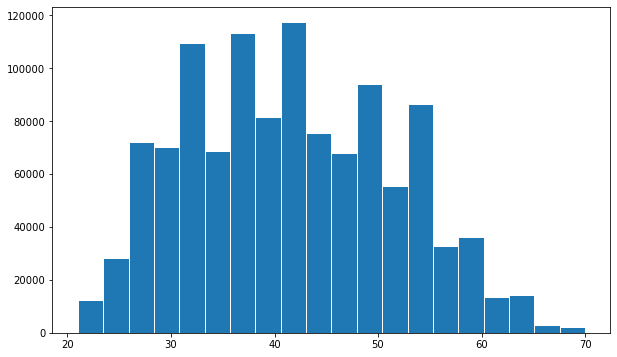

In [72]:
plt.figure(figsize=(10,6))
plt.hist(app.AGE,bins = 20, edgecolor='White')
plt.show()

#### As we can see we are unable to get proper conclusions from above plot so now let's divide the hist into bins and make the plot better understandable

In [73]:
# Let's create the bins of age and count the individuals belonging to the specific age range

age_range = ['<30','30-40','40-50','50-60','60+']
app['AGE_GROUP'] = pd.cut(app.AGE, [0,30,40,50,60,999], labels=age_range)
app['AGE_GROUP'].value_counts()

30-40    373001
40-50    354609
50-60    210516
<30      182700
60+       32956
Name: AGE_GROUP, dtype: int64

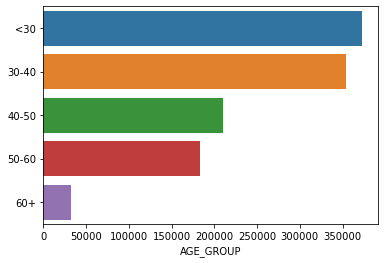

In [74]:
#  plotting a bar graph based on age

sns.barplot(app.AGE_GROUP.value_counts(), age_range)
plt.show()

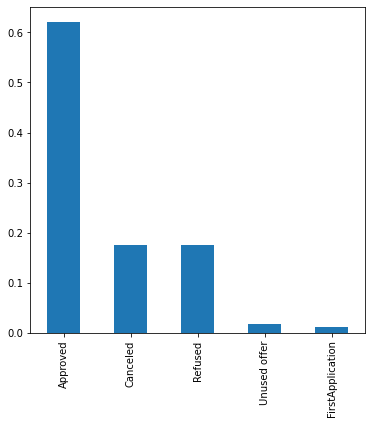

In [75]:
#Plotting bar graph to check for previous application status 
plt.figure(figsize=(6,6))
app.PREV_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.show()

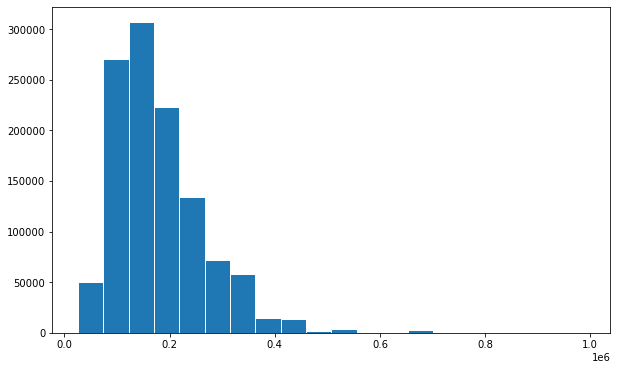

In [76]:
plt.figure(figsize=(10,6))
plt.hist(app[app.AMT_INCOME_TOTAL < 10**6].AMT_INCOME_TOTAL, bins=20, edgecolor='White')
plt.show()

#### Derived Metrics

In [77]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app['AMT_INCOME_RANGE']=pd.cut(app['AMT_INCOME_TOTAL'],bins,labels=slot)

In [78]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app['AMT_CREDIT_RANGE']=pd.cut(app['AMT_CREDIT'],bins=bins,labels=slots)

In [79]:
# Now lets divide the dataset into two datasets for  target=1 as client with payment difficulties and target=0 for all others

safe=app.loc[app["TARGET"]==0]
difficulties=app.loc[app["TARGET"]==1]

#### Performing univariate analysis for the divided categories

##### Analysis for safe for which target is equal to 0

In [80]:
# Count plotting in logarithmic scale

def dataplot(app,col,title,hue =None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    val = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(app[col].unique()) + 7 + 4*len(val.unique())
    fig.set_size_inches(width , 6)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = app, x= col, order=app[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

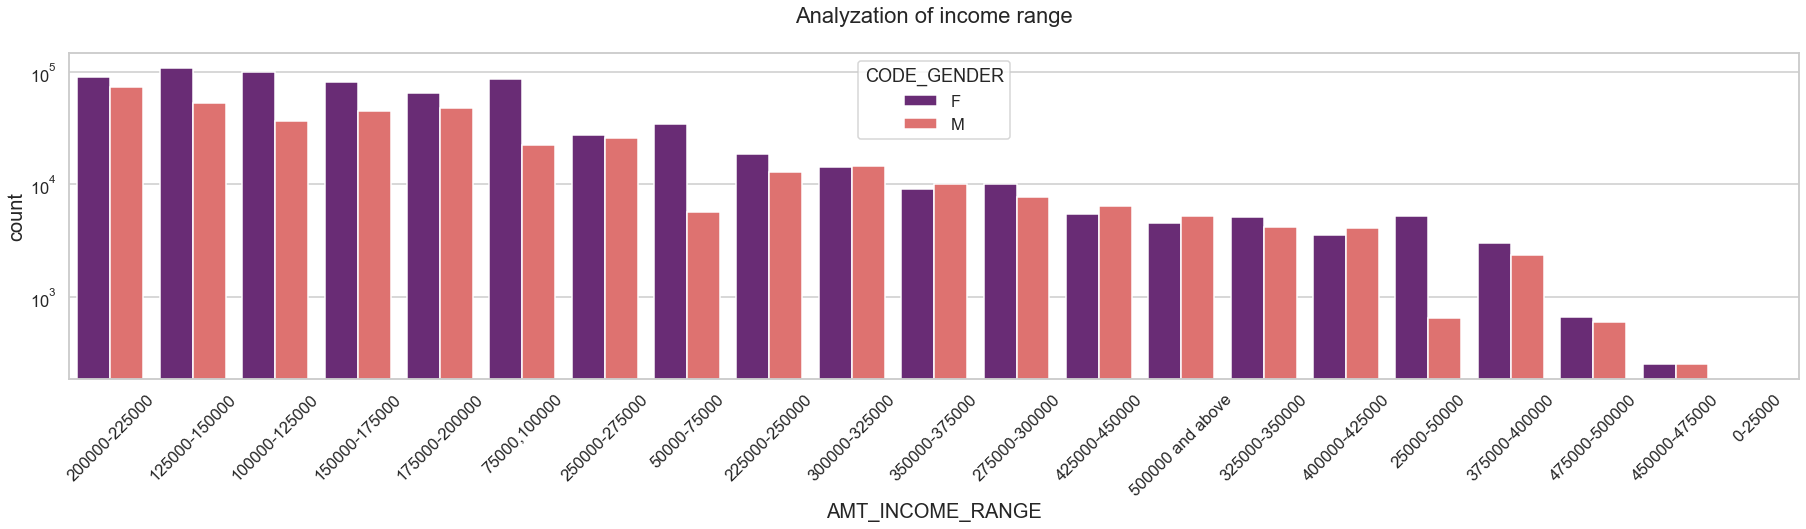

In [81]:
# PLotting for income range

dataplot(safe,col='AMT_INCOME_RANGE',title='Analyzation of income range',hue='CODE_GENDER')

#### Inferences:
 - As we observe the count of female is more than male 
 - The income range of 125000 - 150000 has more credits
 - The least count of credits is found in income range of 450000 - 475000

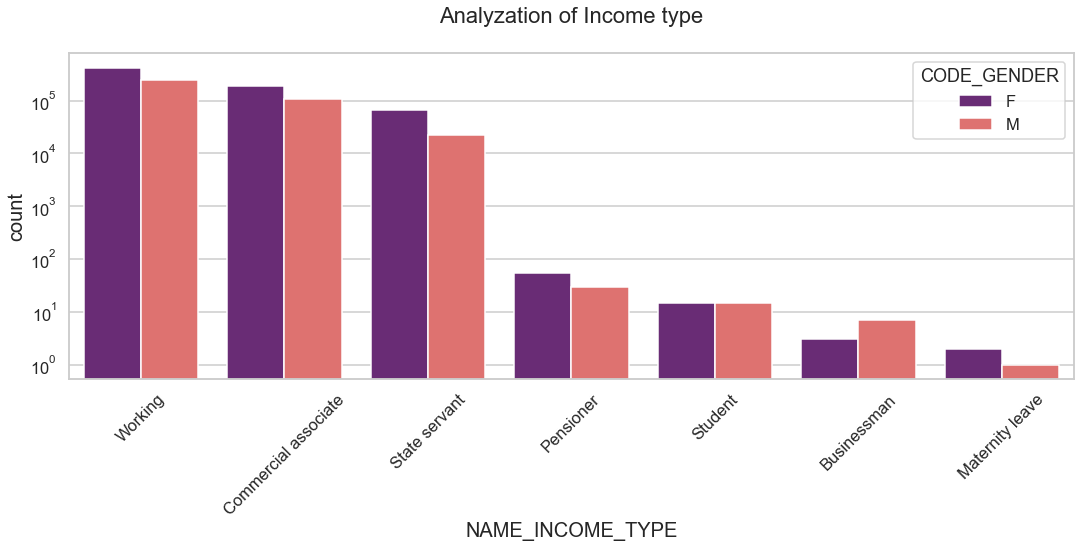

In [82]:
# Plotting for Income type

dataplot(safe,col='NAME_INCOME_TYPE',title='Analyzation of Income type',hue='CODE_GENDER')

#### Inference:

 - For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
 - And Females are having more number of credits than male for above mentioned income type.
 - Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

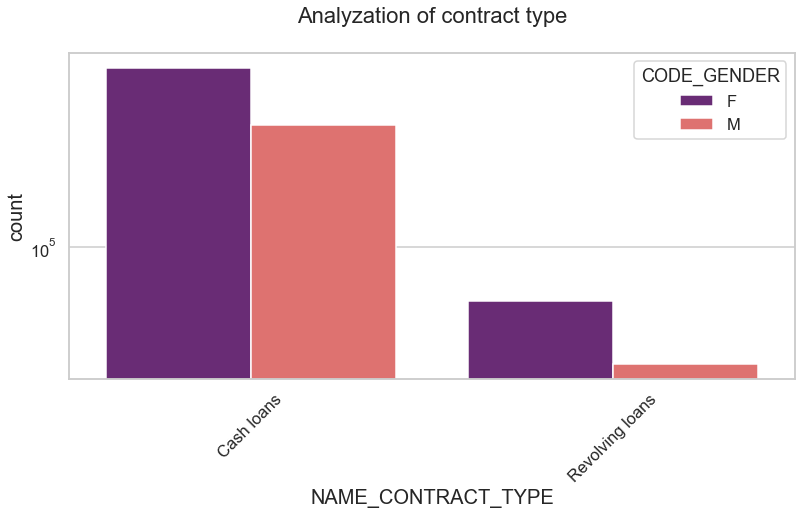

In [83]:
# Plotting for Contract type

dataplot(safe,col='NAME_CONTRACT_TYPE',title='Analyzation of contract type',hue='CODE_GENDER')

#### Inferences
 - For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
 - Female has highest count for credits.

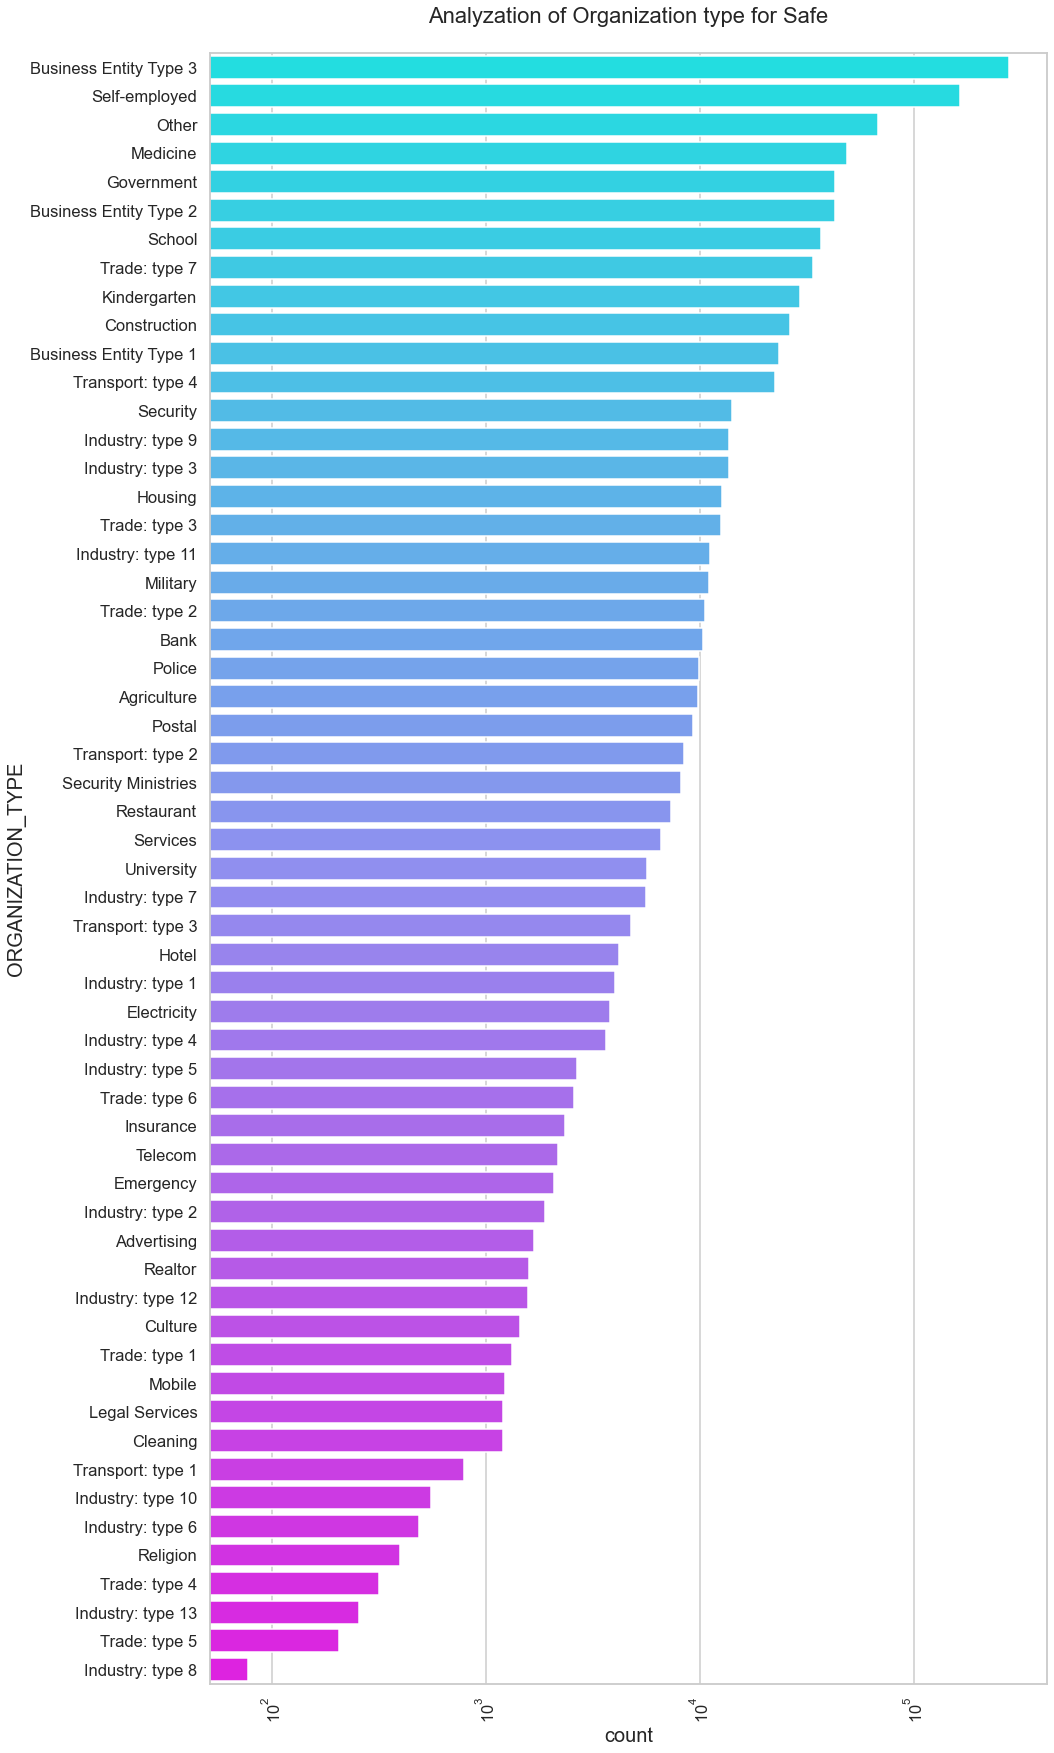

In [84]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Analyzation of Organization type for Safe")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=safe,y='ORGANIZATION_TYPE',order=safe['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()


#### Inferences
 - Clients applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
 - Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

##### Analysis for difficulties for which target is equal to 1

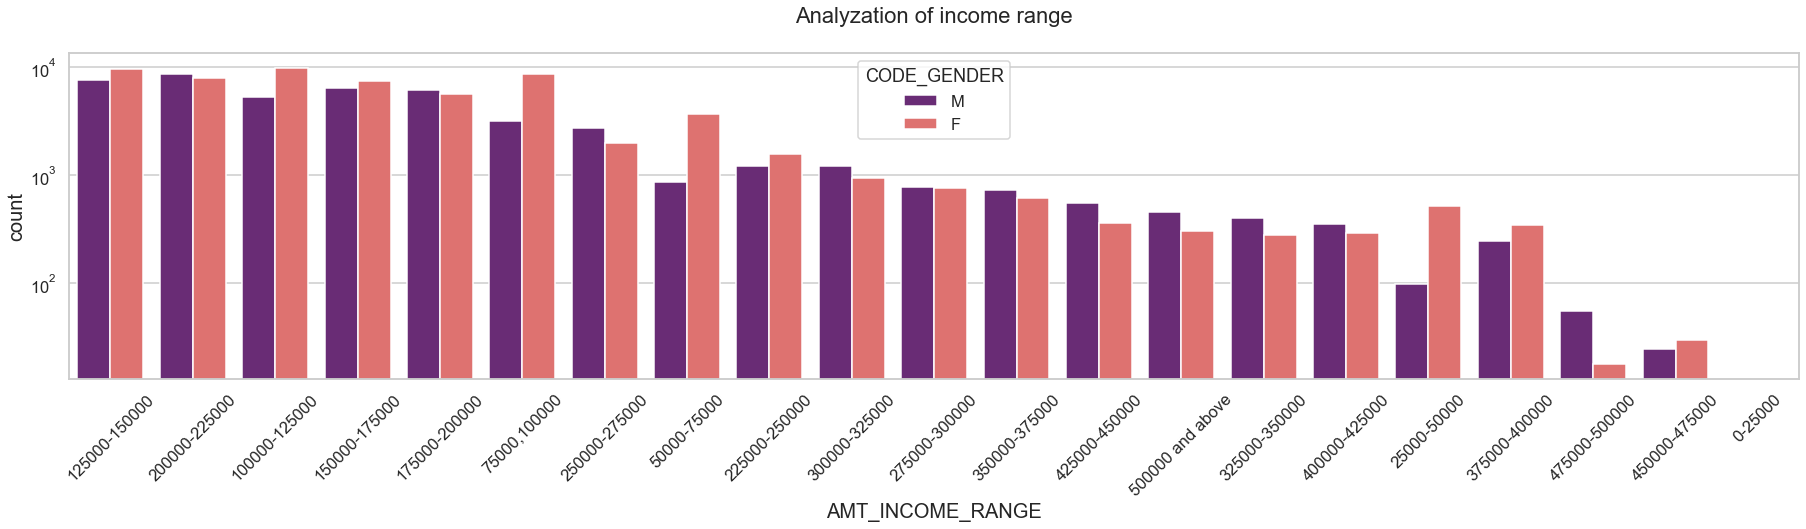

In [85]:
# PLotting for income range

dataplot(difficulties,col='AMT_INCOME_RANGE',title='Analyzation of income range',hue='CODE_GENDER')

#### Inferences
 - Male count is higher than female 
 - The income range of  100000 - 125000 shows highest male credit count 

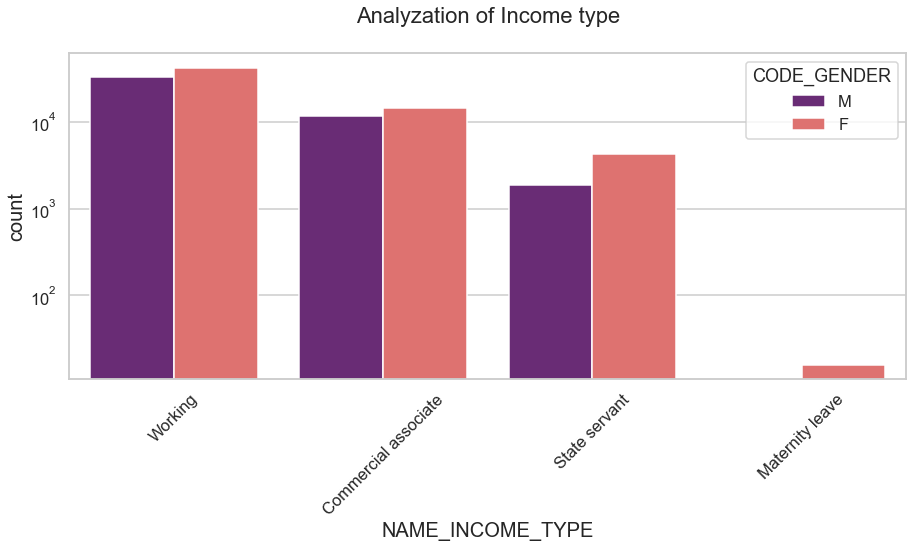

In [86]:
# Plotting for Income type

dataplot(difficulties,col='NAME_INCOME_TYPE',title='Analyzation of Income type',hue='CODE_GENDER')

#### Inferences
 - For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
 - Females are having more number of credits than male.
 - Less number of credits for income type ‘Maternity leave’ 

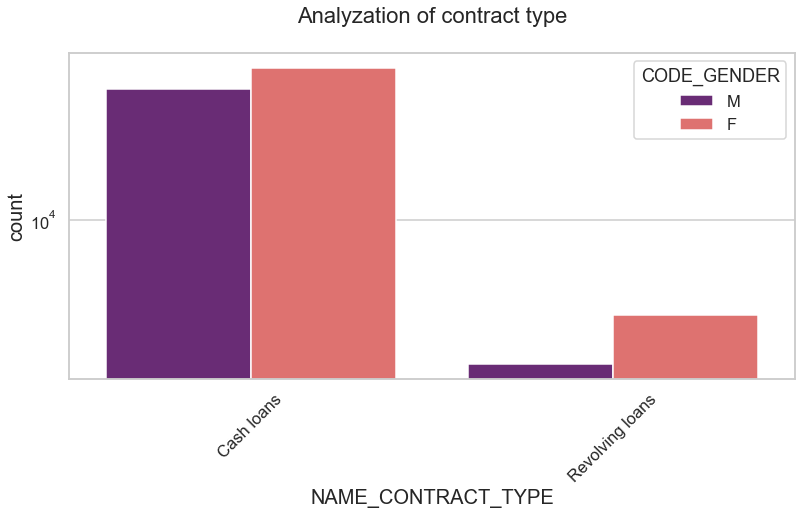

In [87]:
# Plotting for Contract type

dataplot(difficulties,col='NAME_CONTRACT_TYPE',title='Analyzation of contract type',hue='CODE_GENDER')

#### Inferences
 - For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
 - As we observe for revoking loan there male count is very less

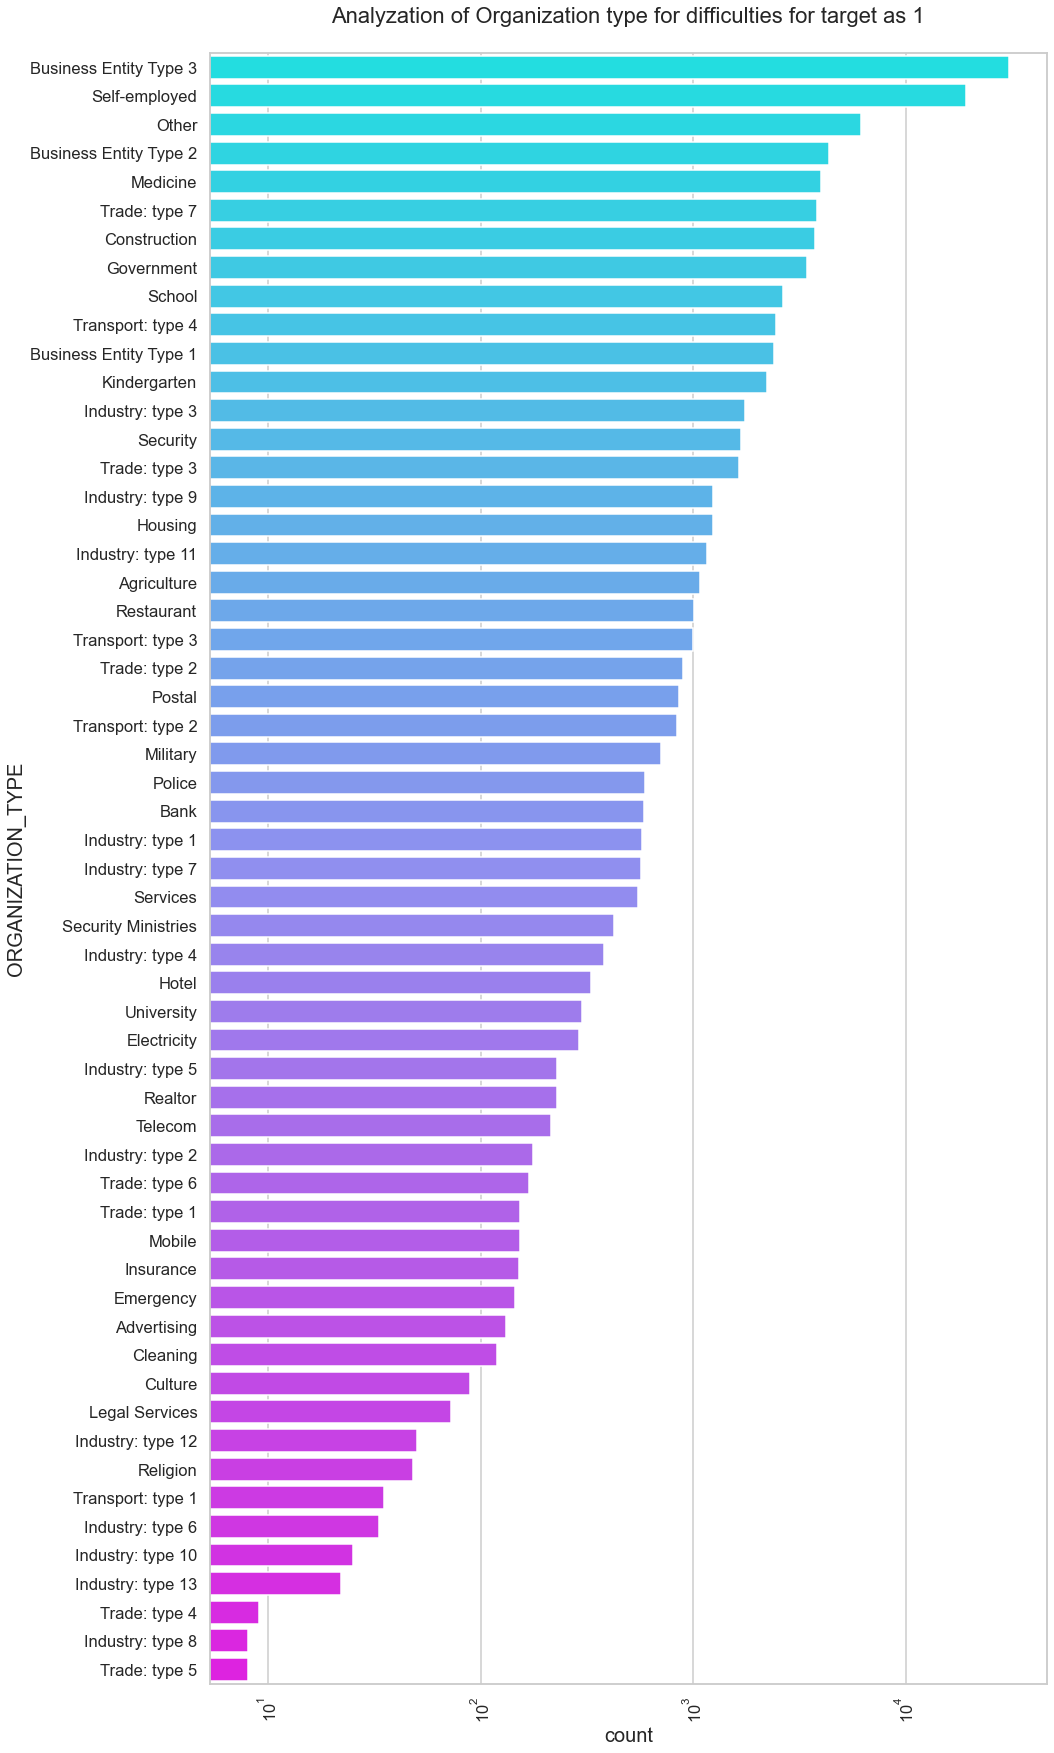

In [88]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Analyzation of Organization type for difficulties for target as 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=difficulties,y='ORGANIZATION_TYPE',order=difficulties['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

#### Inference
 - Clients applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
 - Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

In [89]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=safe.iloc[0:,2:29]
target1_corr=difficulties.iloc[0:,2:29]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [90]:
# Correlation for target 0

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
CNT_CHILDREN,1.000000,-0.025884,-0.020560,-0.003727,-0.023827,-0.028761,0.307408,0.044336,0.160580,-0.107239,0.017854,0.000701,0.001762,-0.009604,0.000245,-0.037218,0.012080
AMT_INCOME_TOTAL,-0.025884,1.000000,0.380921,0.454626,0.383125,0.099095,-0.061517,-0.060602,0.033786,-0.025418,-0.206812,0.000734,-0.004138,-0.113464,-0.003593,-0.006646,0.094350
AMT_CREDIT,-0.020560,0.380921,1.000000,0.817588,0.984791,0.057317,-0.153304,-0.097258,-0.014920,-0.020453,-0.088683,0.000856,-0.004395,-0.044029,0.016215,0.017580,0.005015
AMT_ANNUITY,-0.003727,0.454626,0.817588,1.000000,0.814973,0.060085,-0.077942,-0.065401,0.018083,-0.008611,-0.096551,0.000004,-0.002283,-0.052874,0.011777,0.002370,0.055209
AMT_GOODS_PRICE,-0.023827,0.383125,0.984791,0.814973,1.000000,0.066234,-0.151758,-0.101936,-0.013650,-0.022051,-0.101240,0.000813,-0.004225,-0.022641,0.015297,0.034264,0.005097
REGION_POPULATION_RELATIVE,-0.028761,0.099095,0.057317,0.060085,0.066234,1.000000,-0.050048,-0.010048,-0.040347,-0.014304,-0.132250,0.000688,0.003702,-0.013818,-0.004057,0.060065,0.025537
DAYS_BIRTH,0.307408,-0.061517,-0.153304,-0.077942,-0.151758,-0.050048,1.000000,0.288756,0.263631,0.056634,0.008366,-0.001640,0.002725,0.049676,-0.003196,-0.026984,0.073269
DAYS_EMPLOYED,0.044336,-0.060602,-0.097258,-0.065401,-0.101936,-0.010048,0.288756,1.000000,0.125181,0.091199,0.041395,-0.001450,0.002314,-0.014686,-0.004093,-0.046503,0.028917
DAYS_REGISTRATION,0.160580,0.033786,-0.014920,0.018083,-0.013650,-0.040347,0.263631,0.125181,1.000000,0.036189,-0.015954,0.000200,-0.004508,0.012905,0.000394,-0.067366,0.027586
DAYS_ID_PUBLISH,-0.107239,-0.025418,-0.020453,-0.008611,-0.022051,-0.014304,0.056634,0.091199,0.036189,1.000000,-0.004368,-0.001112,0.002985,-0.010255,0.002755,-0.023415,0.008505


In [91]:
# Correlation for target 1

target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
CNT_CHILDREN,1.000000,-0.043495,-0.005438,0.015952,-0.011238,-0.021032,0.228488,0.020520,0.118100,-0.080765,0.028146,NaN,0.003902,-0.004041,-0.001267,-0.036860,0.008518
AMT_INCOME_TOTAL,-0.043495,1.000000,0.326698,0.394573,0.330556,0.053521,-0.113291,-0.046897,0.008815,-0.041914,-0.178295,NaN,-0.004176,-0.129738,0.005577,-0.025050,0.103053
AMT_CREDIT,-0.005438,0.326698,1.000000,0.808141,0.976567,0.048336,-0.180127,-0.096657,-0.019045,-0.039669,-0.055447,NaN,-0.007569,-0.067593,0.017950,-0.015694,0.016761
AMT_ANNUITY,0.015952,0.394573,0.808141,1.000000,0.802667,0.035520,-0.079861,-0.052905,0.031616,-0.021080,-0.077964,NaN,-0.004905,-0.057912,0.012435,-0.026775,0.068323
AMT_GOODS_PRICE,-0.011238,0.330556,0.976567,0.802667,1.000000,0.062102,-0.175411,-0.107526,-0.019164,-0.041029,-0.072624,NaN,-0.007236,-0.038582,0.016833,0.005456,0.021293
REGION_POPULATION_RELATIVE,-0.021032,0.053521,0.048336,0.035520,0.062102,1.000000,-0.046727,-0.020752,-0.027047,-0.023425,-0.107027,NaN,-0.005699,-0.020391,-0.005261,0.037922,0.014152
DAYS_BIRTH,0.228488,-0.113291,-0.180127,-0.079861,-0.175411,-0.046727,1.000000,0.249975,0.191446,0.104614,-0.027874,NaN,-0.003352,0.063118,0.000519,-0.000459,0.051294
DAYS_EMPLOYED,0.020520,-0.046897,-0.096657,-0.052905,-0.107526,-0.020752,0.249975,1.000000,0.101680,0.085008,0.011422,NaN,0.007470,-0.027819,-0.010365,-0.055602,0.015468
DAYS_REGISTRATION,0.118100,0.008815,-0.019045,0.031616,-0.019164,-0.027047,0.191446,0.101680,1.000000,0.064841,-0.000193,NaN,0.004366,0.020896,0.009287,-0.069321,0.020813
DAYS_ID_PUBLISH,-0.080765,-0.041914,-0.039669,-0.021080,-0.041029,-0.023425,0.104614,0.085008,0.064841,1.000000,-0.003145,NaN,0.007309,-0.002344,0.018221,-0.018697,0.031268


In [92]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

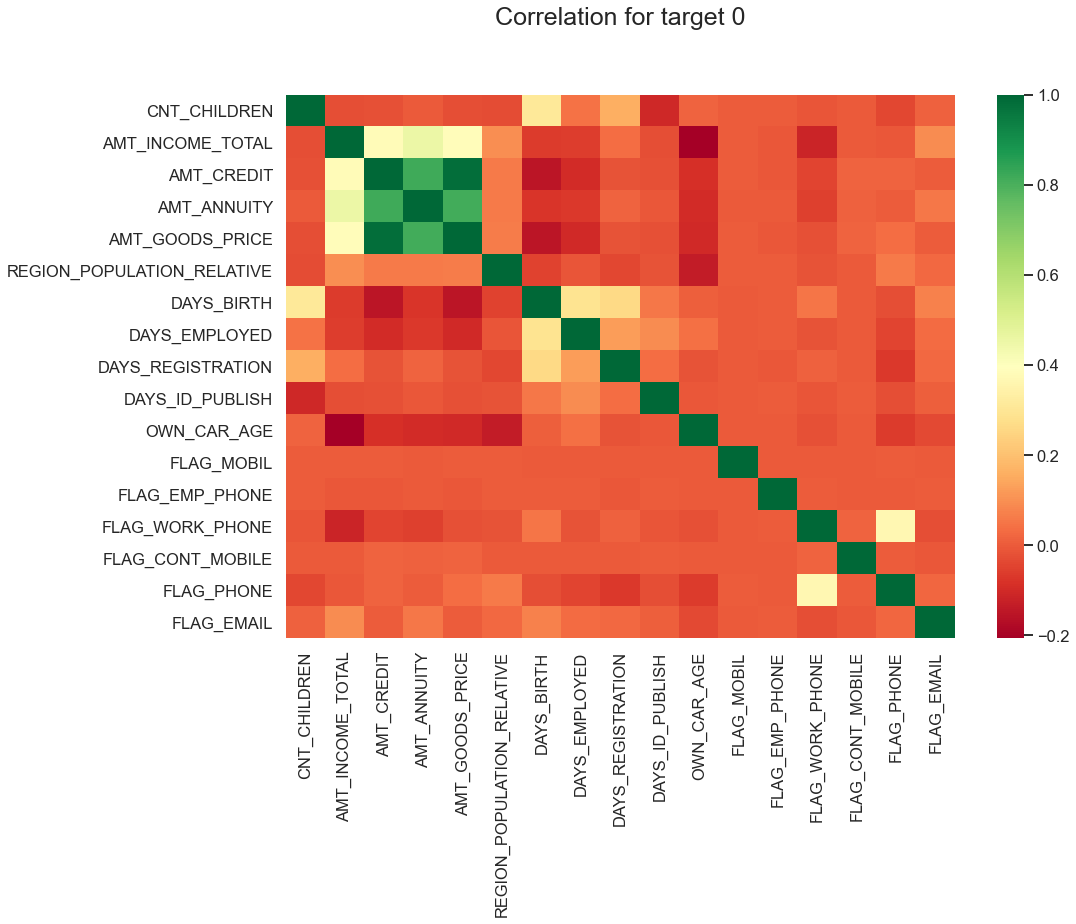

In [93]:
# For Target 0

targets_corr(data=target0,title='Correlation for target 0')

#### Inferences
 - Credit amount is higher for low age and vice-versa.
 - Credit amount is higher for less children count client have and vice-versa.
 - Credit amount is higher to densely populated area.
 - The income is also higher in densely populated area.

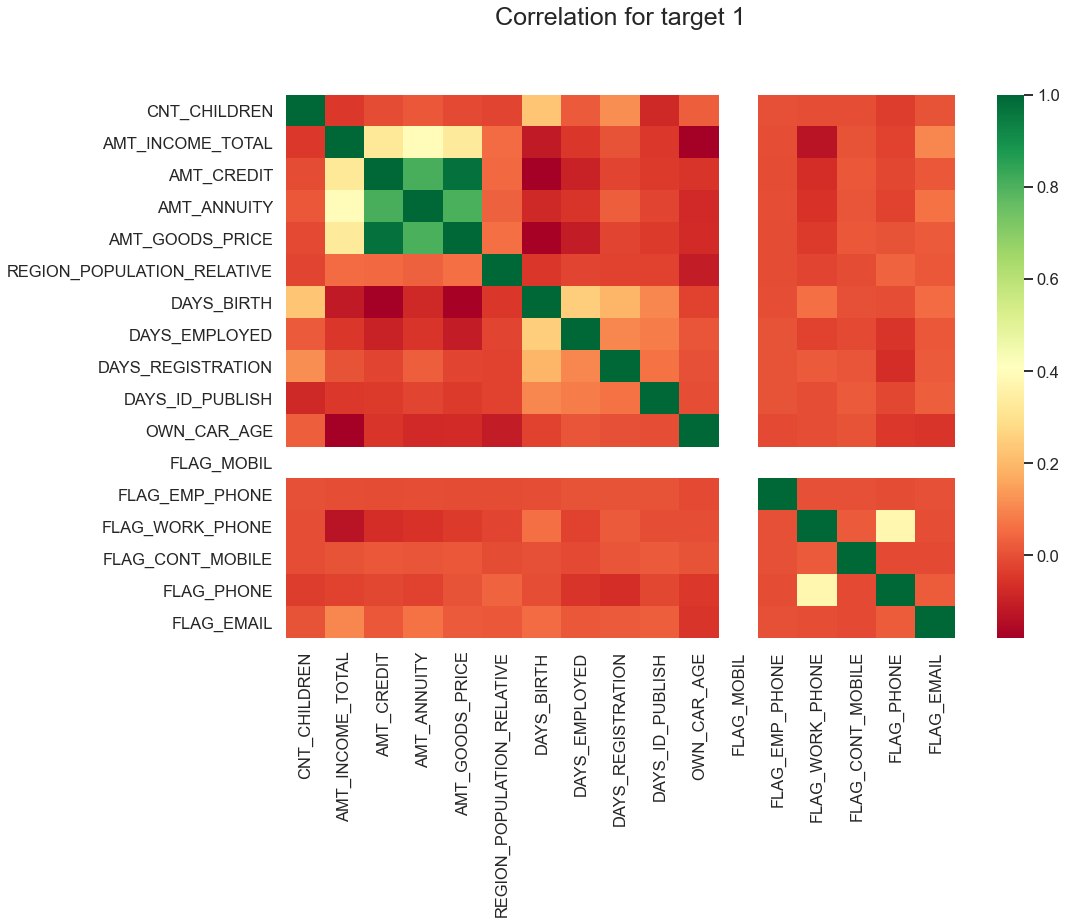

In [94]:
# For Target 1

targets_corr(data=target1,title='Correlation for target 1')

#### Inferences
 - The client's permanent address does not match contact address are having less children and vice-versa
 - The client's permanent address does not match work address are having less children and vice-versa

In [95]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    sns.boxplot(data =difficulties, x=col,orient='v')
    plt.show()

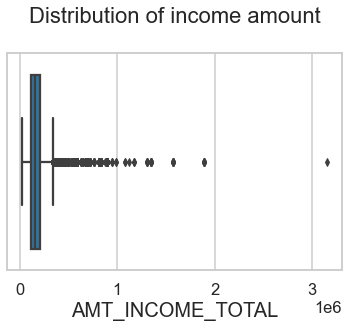

In [96]:
# Distribution of income amount

univariate_numerical(data=safe,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

#### Inferences
 - Some outliers are noticed in income amount.
 - The third quartiles is very slim for income amount.

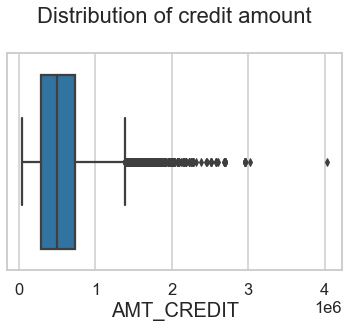

In [97]:
# Disrtibution of credit amount

univariate_numerical(data=safe,col='AMT_CREDIT',title='Distribution of credit amount')

#### Inferences
 - Some outliers are noticed in credit amount.
 - The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

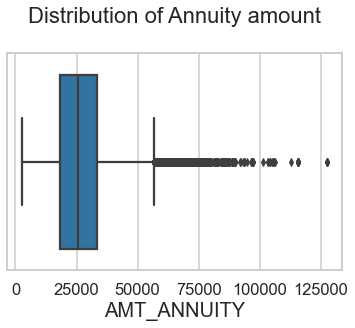

In [98]:
# Distribution of anuuity amount

univariate_numerical(data=safe,col='AMT_ANNUITY',title='Distribution of Annuity amount')

#### Inferences
 - Some outliers are noticed in annuity amount.
 - The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

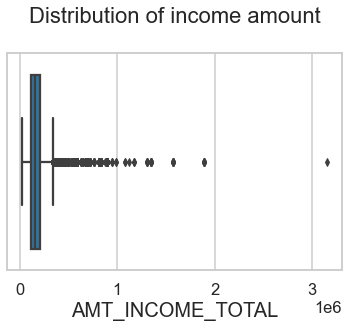

In [99]:
# Distribution of income amount

univariate_numerical(data=difficulties,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

#### Inferences
 - Some outliers are noticed in income amount.
 - The third quartiles is very slim for income amount.
 - Most of the clients of income are present in first quartile.

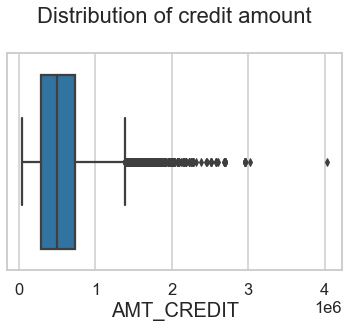

In [100]:
# Distribution of credit amount

univariate_numerical(data=difficulties,col='AMT_CREDIT',title='Distribution of credit amount')

#### Inferences
 - Some outliers are noticed in credit amount.
 - The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

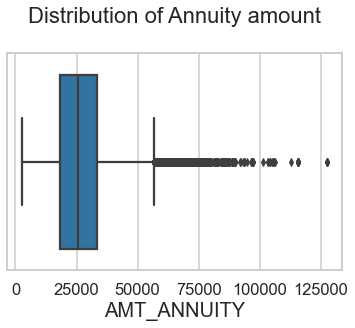

In [101]:
# Distribution of Annuity amount

univariate_numerical(data=difficulties,col='AMT_ANNUITY',title='Distribution of Annuity amount')

#### Inferences
 - Some outliers are noticed in annuity amount.
 - The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

#### Bivariate analysis for numerical variables

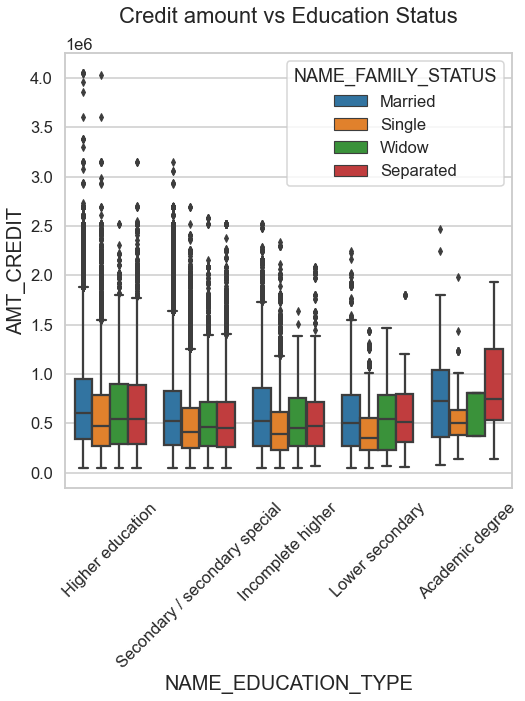

In [102]:
# Box plotting for Credit amount

plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.boxplot(data =safe, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### Inferences
 - Family status of 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. 
 - Also, higher education of family status of 'marriage', 'single' are having more outliers.  
 - Marriage for Academic degree is having most of the credits in the third quartile.

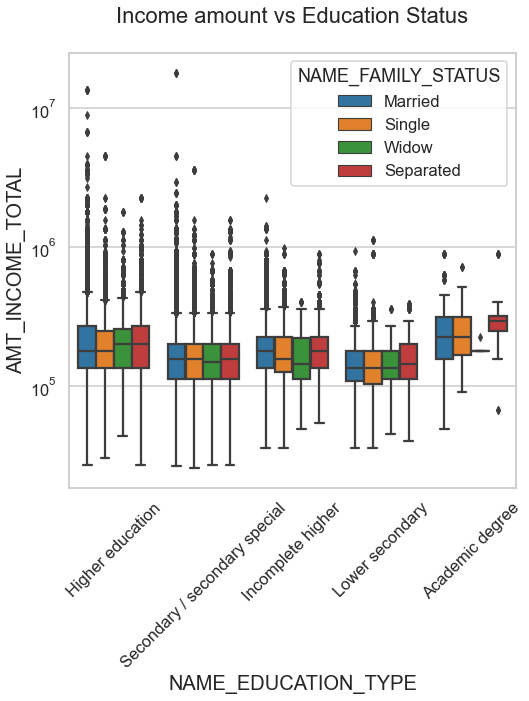

In [103]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =safe, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Inferences
 - Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. 
 - Less outlier are having for Academic degree but there income amount is little higher that Higher education. 
 - Lower secondary of civil marriage family status are have less income amount than others.

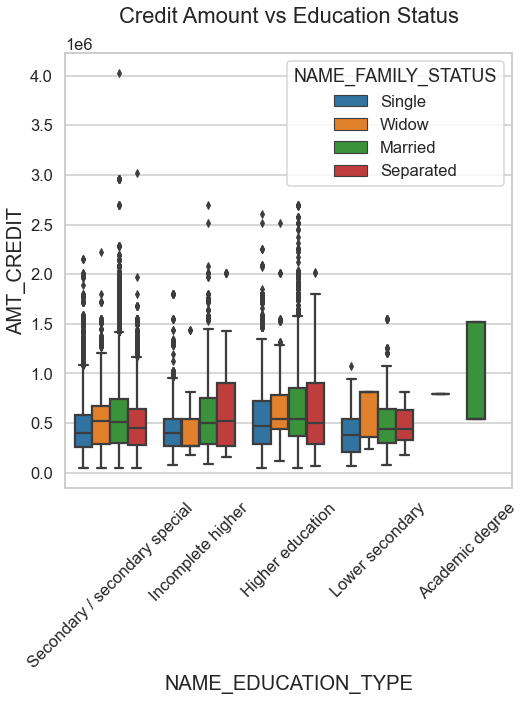

In [104]:
# Box plotting for credit amount

plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.boxplot(data =difficulties, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

#### Inferences
 - Family status of 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.

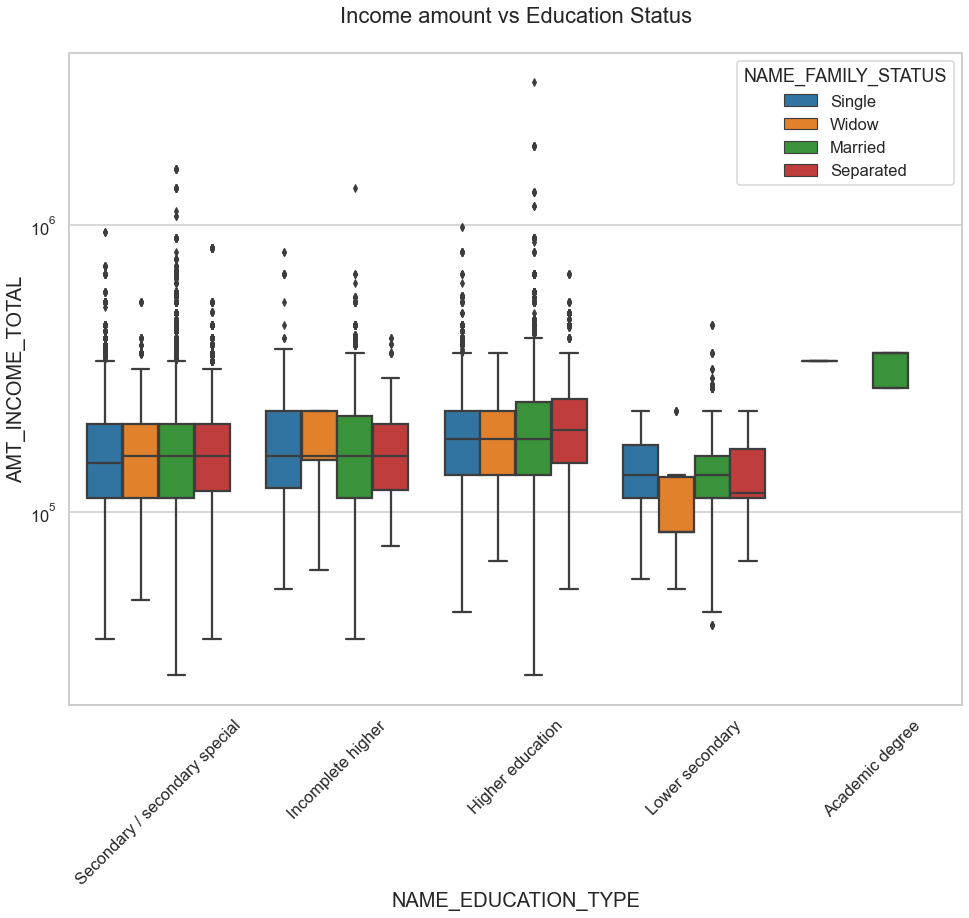

In [105]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =difficulties, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Inferences
 - The incomplete higher has less outliers
 - The higher education shows to have more outliers with respect to income

In [106]:
previous_app=previous_app.drop(previous_app[previous_app['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_app=previous_app.drop(previous_app[previous_app['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)


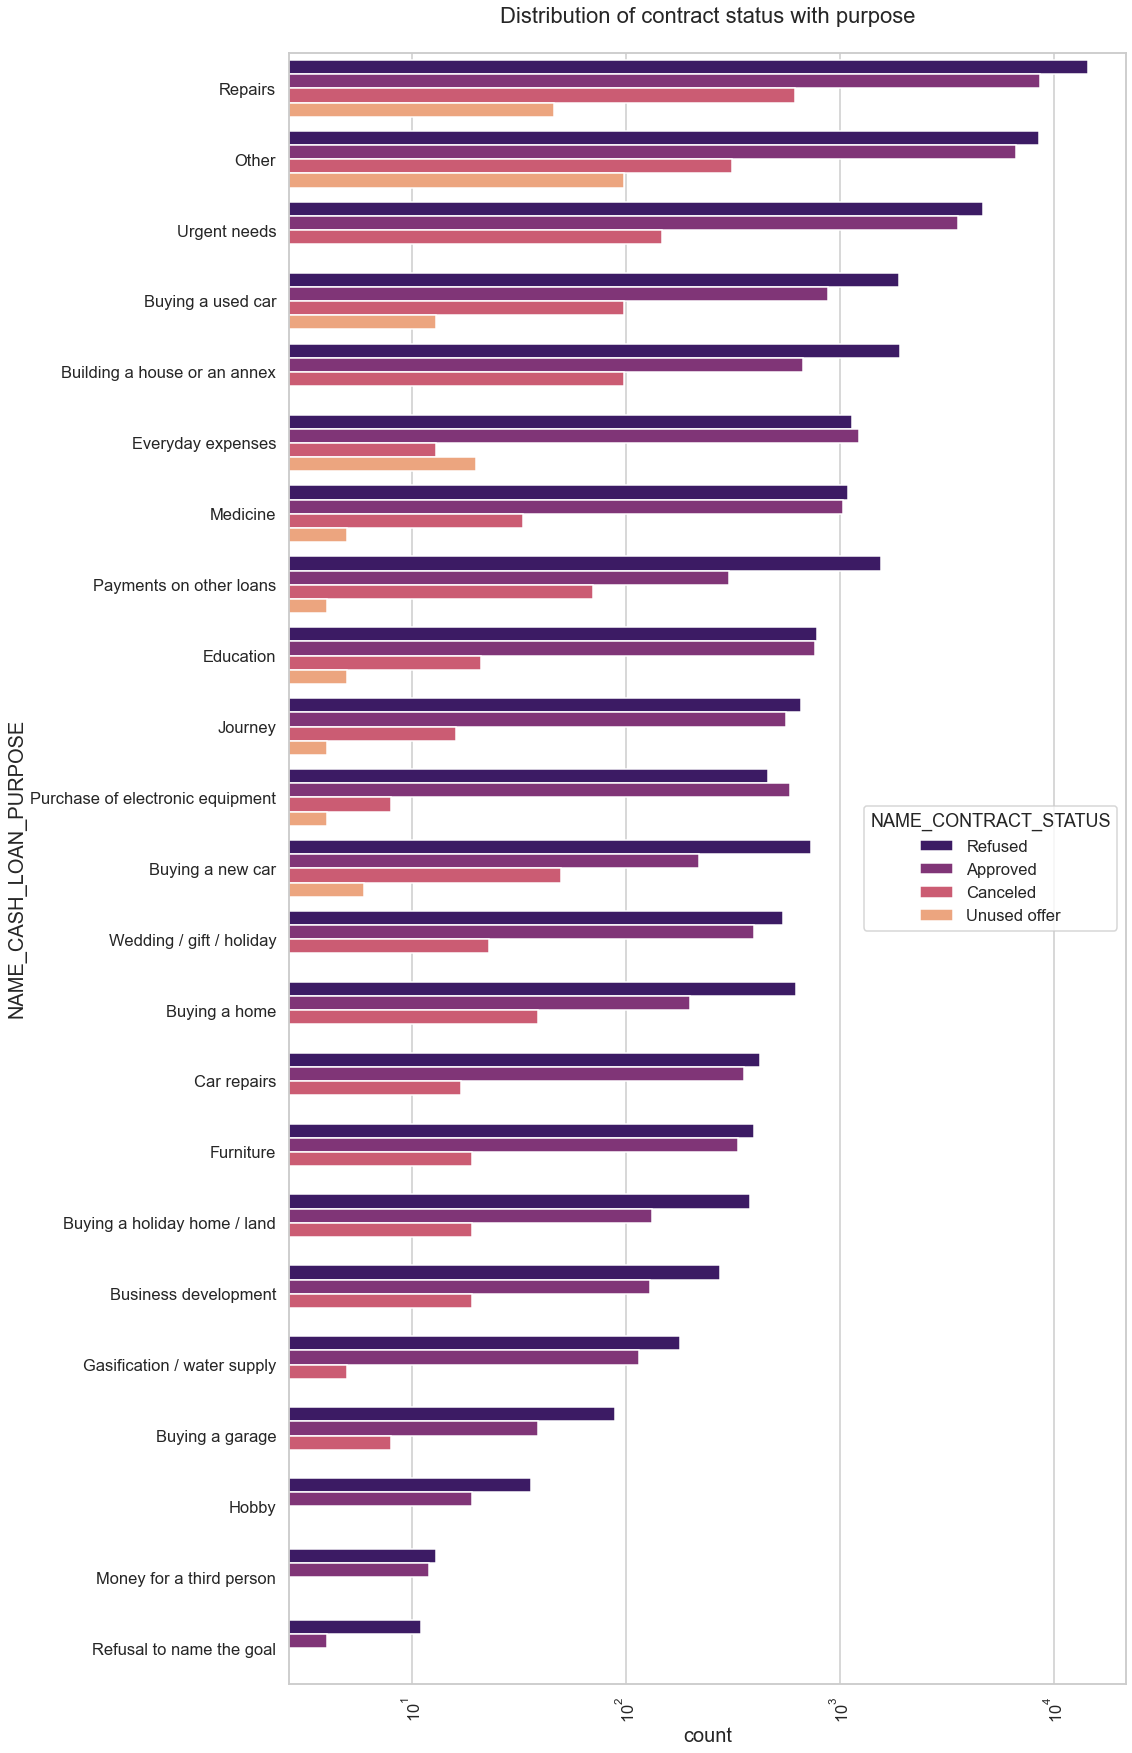

In [107]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purpose')
ax = sns.countplot(data = previous_app, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=previous_app['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

#### Inferences
 - Most rejection of loans came from purpose 'repairs'.
 - For education purposes we have equal number of approves and rejection
 - Paying other loans and buying a new car is having significant higher rejection than approves.

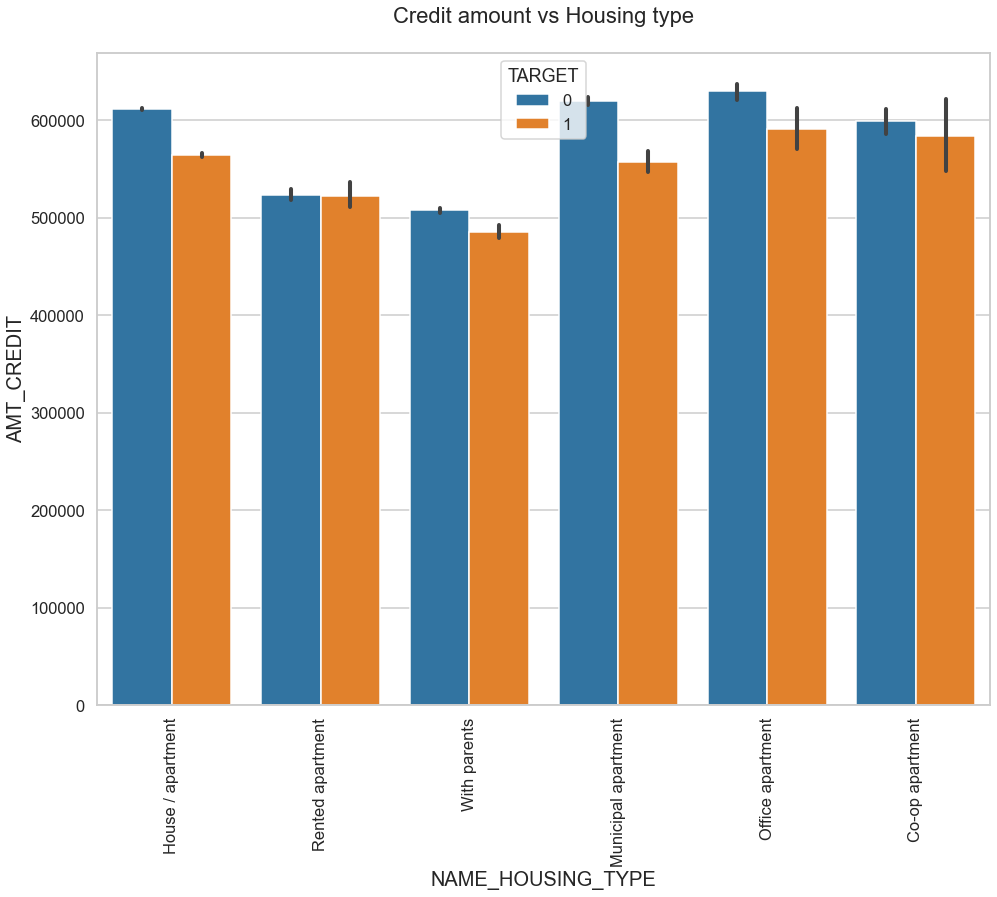

In [108]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =app, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Credit amount vs Housing type')
plt.show()


#### Inferences
 - Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. 
 - So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
 - Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.